In [5]:
cd D:\ThisSemester\CompNeuro\Homeworks\Hw4\HW4_Can_Kocagil\Assignment


D:\ThisSemester\CompNeuro\Homeworks\Hw4\HW4_Can_Kocagil\Assignment


In [7]:
pwd

'D:\\ThisSemester\\CompNeuro\\Homeworks\\Hw4\\HW4_Can_Kocagil\\Assignment'

In [11]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is 1C7D-3437

 Directory of D:\ThisSemester\CompNeuro\Homeworks\Hw4\HW4_Can_Kocagil\Assignment

10.04.2021  00:21    <DIR>          .
10.04.2021  00:21    <DIR>          ..
04.02.2020  03:29           108.327 eee482_homework4.pdf
29.01.2020  11:06         2.206.114 hw4_data1.mat
               2 File(s)      2.314.441 bytes
               2 Dir(s)  171.489.239.040 bytes free


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import h5py

### Part A

In [95]:
f = h5py.File('hw4_data1.mat','r')

faces = np.array(f['faces'][:]).T

print(faces.shape)

(1000, 1024)


In [46]:
N, num_pixel = faces.shape
image_faces = faces.reshape(N, np.int(np.sqrt(num_pixel)), np.int(np.sqrt(num_pixel)))
print(image_faces.shape)

(1000, 32, 32)


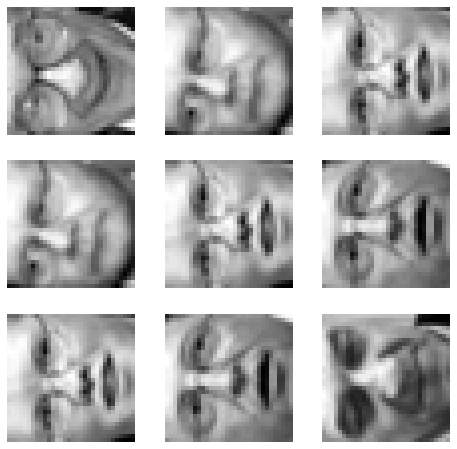

In [112]:
fig, axs = plt.subplots(3,3,figsize = (8,8))
num_examples = 9

for i in range(3):
    for j in range(3):
        axs[i,j].imshow(image_faces[i + j], cmap = 'gray')
        axs[i,j].axis('off')
    

In [80]:
# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline


def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=faces, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()


def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
            x=component1,
            y=component2,
            z=component3,
            mode='markers',
            marker=dict(
                size=10,
                #color=y,                # set color to an array/list of desired values
                colorscale='Rainbow',   # choose a colorscale
                opacity=1,
                line_width=1
            )
        )])
    # tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'

    fig.show()
    
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(faces)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

plot_2d(principalComponents[:, 0], principalComponents[:, 1])

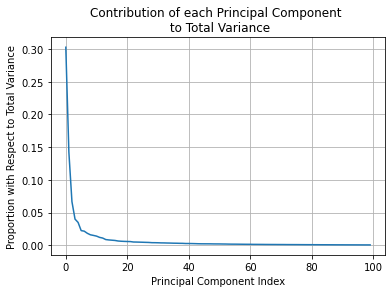

In [81]:
latent_dim = 100
pca = PCA(n_components = latent_dim)
principalComponents = pca.fit_transform(faces)

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component Index')
plt.ylabel('Proportion with Respect to Total Variance')
plt.title('Contribution of each Principal Component \n to Total Variance')
plt.grid()
plt.show()

In [ ]:
fig, axs = plt.subplots(5,5,figsize = (12,12))

for i in range(5):
    for j in range(5):
        axs[i,j].imshow(pca.components_.shape[i + j], cmap = 'gray')
        axs[i,j].axis('off')

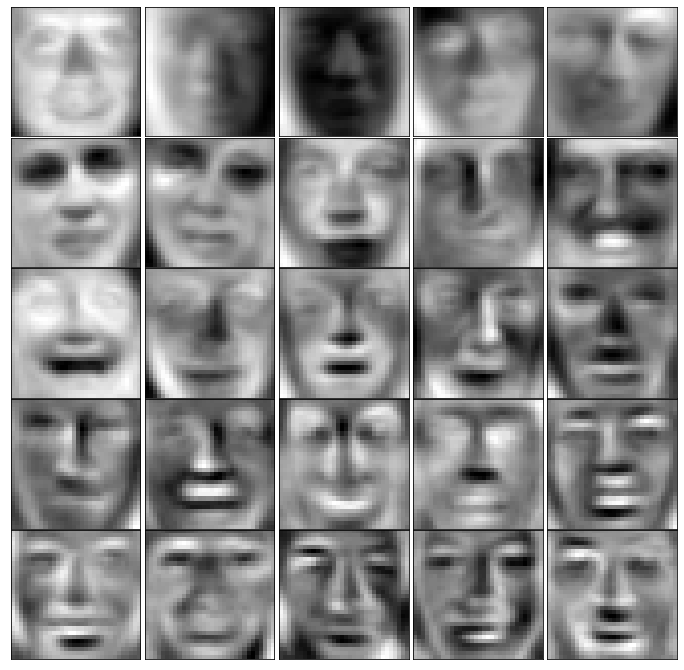

In [90]:
fig, axes = plt.subplots(5, 5, figsize=(12,12),
subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(32, 32).T, cmap = 'gray')

### Part B

In [113]:
def pca_reconstruction(data,trained_pca,up_to):
    pca_mean = trained_pca.mean_ 
    mean_removed = data - pca_mean
    pca_components = trained_pca.components_[:up_to]
    reconstructed = mean_removed @ pca_components.T @ pca_components + pca_mean
    
    return reconstructed
faces_PCA_10 = pca_reconstruction(faces,pca,10)
faces_PCA_25 = pca_reconstruction(faces,pca,25)
faces_PCA_50 = pca_reconstruction(faces,pca,50)

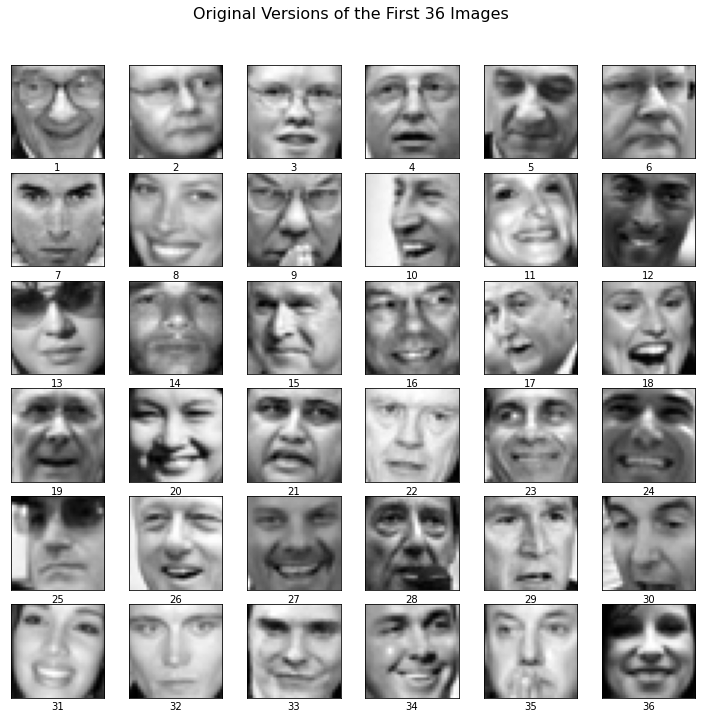

In [114]:
fig, axes = plt.subplots(6, 6, figsize=(10,10), facecolor='white',subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle('Original Versions of the First 36 Images', fontsize='16')
fig.tight_layout(rect=[0, 0, 1, .95])
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i].reshape(32, 32).T, cmap=plt.cm.gray)
    ax.set_xlabel(i+1)